In [1]:
# import libraries
import numpy as np
import numpy.linalg as la
import pylab as p

## 2.2 Root Finding

In [2]:
from cppscripts import RootFinding as RF

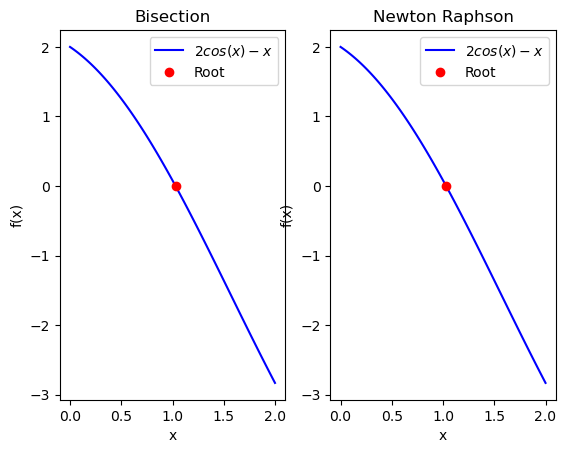

In [3]:
# testing bisection and newton raphson
x = np.linspace(0,2,100)
steps = 1000
eps = 1e-6
def func(x):
    return 2*np.cos(x) - x

y = func(x)
root_bisect, root_bisect_hist = RF.bisection(func, 0, 3, steps, eps)
root_newtonraphson, root_newtonraphson_hist = RF.newtonraphson(func, 0, steps, eps)

p.subplot(1,2,1)
p.xlabel('x')
p.ylabel('f(x)')
p.title('Bisection')
p.plot(x, y, 'b', root_bisect, func(root_bisect),'ro')
p.legend([r'$2cos(x) - x$', r'Root'])

p.subplot(1,2,2)
p.xlabel('x')
p.ylabel('f(x)')
p.title('Newton Raphson')
p.plot(x, y, 'b', root_newtonraphson, func(root_newtonraphson),'ro')
p.legend([r'$2cos(x) - x$', r'Root'])


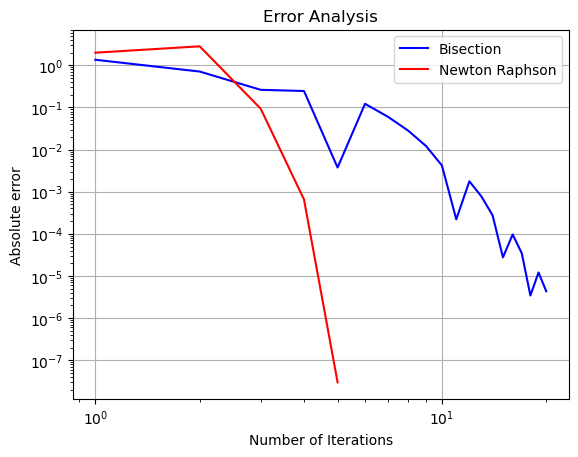

In [4]:
# Error analysis bisection and newton raphson

p.plot(np.arange(1,len(root_bisect_hist)+1), abs(func(root_bisect_hist)), 'b', 
       np.arange(1,len(root_newtonraphson_hist)+1), abs(func(root_newtonraphson_hist)), 'r')
p.xlabel('Number of Iterations')
p.ylabel('Absolute error')
p.title('Error Analysis')
p.xscale("log")
p.yscale("log")
p.grid(True)
p.legend(['Bisection', 'Newton Raphson'])

/tmp/ipykernel_42842/1164724260.py:7: RuntimeWarning: invalid value encountered in divide
  e_odd = temp/np.tan(temp) - np.sqrt(e_b)
/tmp/ipykernel_42842/1164724260.py:3: RuntimeWarning: invalid value encountered in sqrt
  e_even = temp*np.tan(temp) - np.sqrt(e_b)


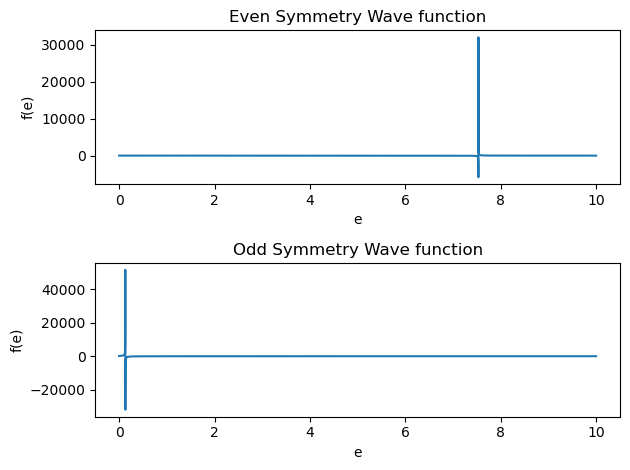

In [5]:
def boundStateEnergyEven(e_b: float) -> float:
    temp = np.sqrt(10 - e_b)
    e_even = temp*np.tan(temp) - np.sqrt(e_b)
    return e_even
def boundStateEnergyOdd(e_b: float) -> float:
    temp = np.sqrt(10 - e_b)
    e_odd = temp/np.tan(temp) - np.sqrt(e_b)
    return e_odd


e_b = np.linspace(0,10,10000)
e_even = boundStateEnergyEven(e_b)
e_odd = boundStateEnergyOdd(e_b)
# root calculation bisection
x_minus = 0
x_plus = 10
steps = 100000
eps = 1e-6
root_bisect, root_bisect_hist = RF.bisection(boundStateEnergyEven, x_minus, x_plus, steps, eps)
# root calculation newton raphson
root_newtonraphson, root_newtonraphson_hist = RF.newtonraphson(boundStateEnergyEven, 1, steps, eps)

# plotting figures
p.subplot(2,1,1)
p.plot(e_b, e_even)
p.xlabel('e')
p.ylabel('f(e)')
p.title('Even Symmetry Wave function')

p.subplot(2,1,2)
p.plot(e_b, e_odd)
p.xlabel('e')
p.ylabel('f(e)')
p.title('Odd Symmetry Wave function')
p.tight_layout()

In [6]:
np.sqrt(-2)

/tmp/ipykernel_42842/2418628377.py:1: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(-2)


nan

In [7]:
np.tan(-np.pi/2)

-1.633123935319537e+16

In [8]:
print(e_even)

[ 0.06542107  0.03329319  0.01969045 ... -3.15995985 -3.16111909
 -3.16227766]


In [9]:
root_newtonraphson

nan

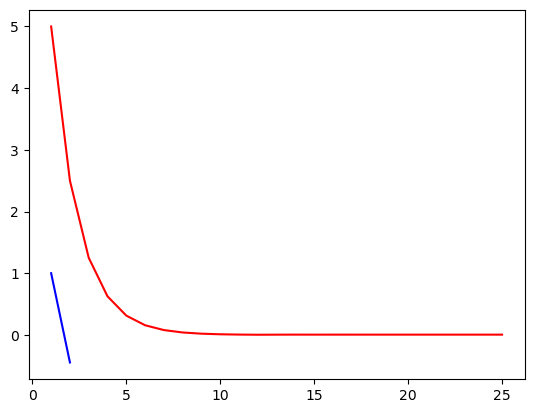

In [10]:
p.plot(np.arange(1,len(root_bisect_hist)+1),root_bisect_hist, 'r', 
       np.arange(1,len(root_newtonraphson_hist)+1),root_newtonraphson_hist, 'b')

## 2.3 Least Squares Fitting

### 2.3.1 Linear Least Squares Fitting

Text(0, 0.5, 'T (C)')

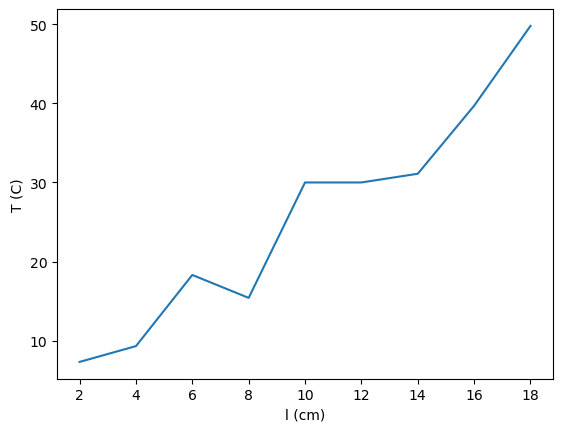

In [11]:
l = np.array([2., 4., 6., 8., 10., 12., 14., 16., 18.])
T = np.array([7.3, 9.3, 18.3, 15.4, 30, 30, 31.1, 39.7, 49.8])

p.plot(l,T)
p.xlabel(r'l (cm)')
p.ylabel(r'T (C)')

The model is y = 0.5388888888889091 + 2.5116666666666654x
The Vandermonde matrix for the data is 
 [[ 1.  2.]
 [ 1.  4.]
 [ 1.  6.]
 [ 1.  8.]
 [ 1. 10.]
 [ 1. 12.]
 [ 1. 14.]
 [ 1. 16.]
 [ 1. 18.]]
The sum of residual error is 9.862532917843948, and the mean of the residual is 6.118562446823085e-15


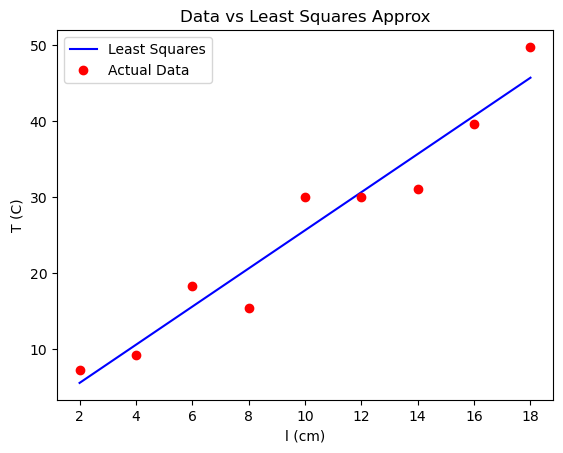

In [14]:
# importing the code
from cppscripts import LeastSquares as LS
# assuming the measurement uncertainty to be 1
measurement_uncertainty = np.ones(l.shape, float)
# fitting linear model 
order_model = 1
a = LS.leastsquares(l, T, measurement_uncertainty, order_model)
print(f"The model is y = {a[0]} + {a[1]}x")
# construct Vandermonde matrix from data
Vandermonde_matrix = LS.vandermonde(l, order_model) 
print(f"The Vandermonde matrix for the data is \n {Vandermonde_matrix}")

# approximate data from the least squares model
T_approx = np.matmul(Vandermonde_matrix, a)

# error analysis
residual = T_approx - T
residual_mean = np.mean(residual)
residual_l2norm = la.norm(residual)
print(f"The sum of residual error is {residual_l2norm}, and the mean of the residual is {residual_mean}")

# plotting the approximation vs the actual data
p.plot(l, T_approx, 'b', l, T, 'ro')
p.xlabel(r'l (cm)')
p.ylabel(r'T (C)')
p.title(r'Data vs Least Squares Approx')
p.legend(["Least Squares","Actual Data"])

In [13]:
type(l)

numpy.ndarray